In [36]:
import scvi
import scanpy as sc
import scipy.stats as stats
import numpy as np
from scipy.stats import mannwhitneyu

In [2]:
# Defining the base path to the directory containing single-cell RNA-seq data.
# Make sure to update this path according to your file system.
base_data_path = "/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/data"

In [4]:
# Load the sub_adata object from an .h5ad file for further analysis
sub_adata = sc.read_h5ad(f'{base_data_path}/sub_adata_sub_cluster_2_complete_stats_analysis.h5ad')


In [5]:
# Load the AnnData object from the specified HDF5 file
# The file is located at the path defined by `base_data_path` and is named 'integrated_0.1.h5ad'
adata = sc.read_h5ad(f'{base_data_path}/integrated_0.1.h5ad')

# Display the loaded AnnData object to inspect its contents
adata


AnnData object with n_obs × n_vars = 73580 × 26811
    obs: 'Sample', 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'n_genes', '_scvi_batch', '_scvi_labels', 'leiden'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'log1p', 'neighbors'
    obsm: 'X_scVI'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [6]:
# Load a pre-trained SCVI model using the provided AnnData object
model = scvi.model.SCVI.load(f'{base_data_path}/model.model', adata)


INFO     File /Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/data/model.model/model.pt already downloaded          


/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/.venv/lib/python3.12/site-packages/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = tor

In [7]:
# Create a 'counts' layer in sub_adata to store a copy of the raw expression data
sub_adata.layers['counts'] = sub_adata.X.copy()


In [8]:
# Set up the sub_adata object for scVI model with specified layers and covariates
scvi.model.SCVI.setup_anndata(
    sub_adata, 
    layer="counts",  # Use the 'counts' layer as input for the model
    categorical_covariate_keys=["Sample"],  # Define categorical covariates
    continuous_covariate_keys=['pct_counts_mt', 'total_counts', 'pct_counts_ribo']  # Define continuous covariates
)


/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/.venv/lib/python3.12/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [9]:
# Initialize a new SCVI model with the prepared sub_adata object
model_2 = scvi.model.SCVI(sub_adata)


In [10]:
# Train the SCVI model on the sub_adata dataset
model_2.train()


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/.venv/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/.venv/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training:   0%|          | 0/400 [00:00<?, ?it/s]

/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/.venv/lib/python3.12/site-packages/scvi/module/_vae.py:565: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/.venv/lib/python3.12/site-packages/scvi/module/_vae.py:565: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/.venv/lib/python3.12/site-packages/scvi/module/_vae.py:565: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/.venv/lib/python3.12/site-packages/scvi/module/_vae.py:565: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generat

In [11]:
# Reminder: Delete the previously saved model folder from the drive to avoid errors
# Save the trained model_2 to the specified directory
model_2.save(f'{base_data_path}/model_3.model_3')


In [12]:
# Load the saved SCVI model using the sub_adata object for reference
model_2 = scvi.model.SCVI.load(f'{base_data_path}/model_3.model_3', sub_adata)


INFO     File /Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/data/model_3.model_3/model.pt already downloaded      


/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/.venv/lib/python3.12/site-packages/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = tor

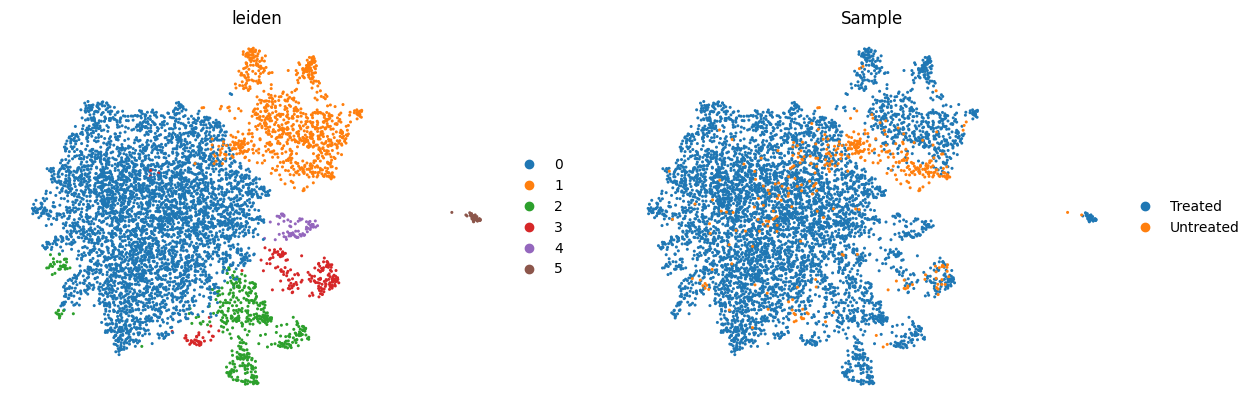

In [15]:
# Make a copy of sub_adata (optional; depends on if you intend to preserve the original state)
sub_adata.copy()

# Obtain the latent representation from the SCVI model and store it in 'obsm'
sub_adata.obsm['X_scVI'] = model_2.get_latent_representation()

# Get the normalized expression and store it in 'layers' for downstream analysis
sub_adata.layers['scvi_normalized'] = model_2.get_normalized_expression(library_size=1e4)

# Compute neighborhood graph based on the SCVI latent representation
sc.pp.neighbors(sub_adata, use_rep='X_scVI')

# Perform Leiden clustering with specified resolution
sc.tl.leiden(sub_adata, resolution=0.20)

# Compute UMAP embedding for visualization
sc.tl.umap(sub_adata)

# Plot UMAP colored by Leiden clusters and Sample information
sc.pl.umap(sub_adata, color=['leiden', 'Sample'], frameon=False)


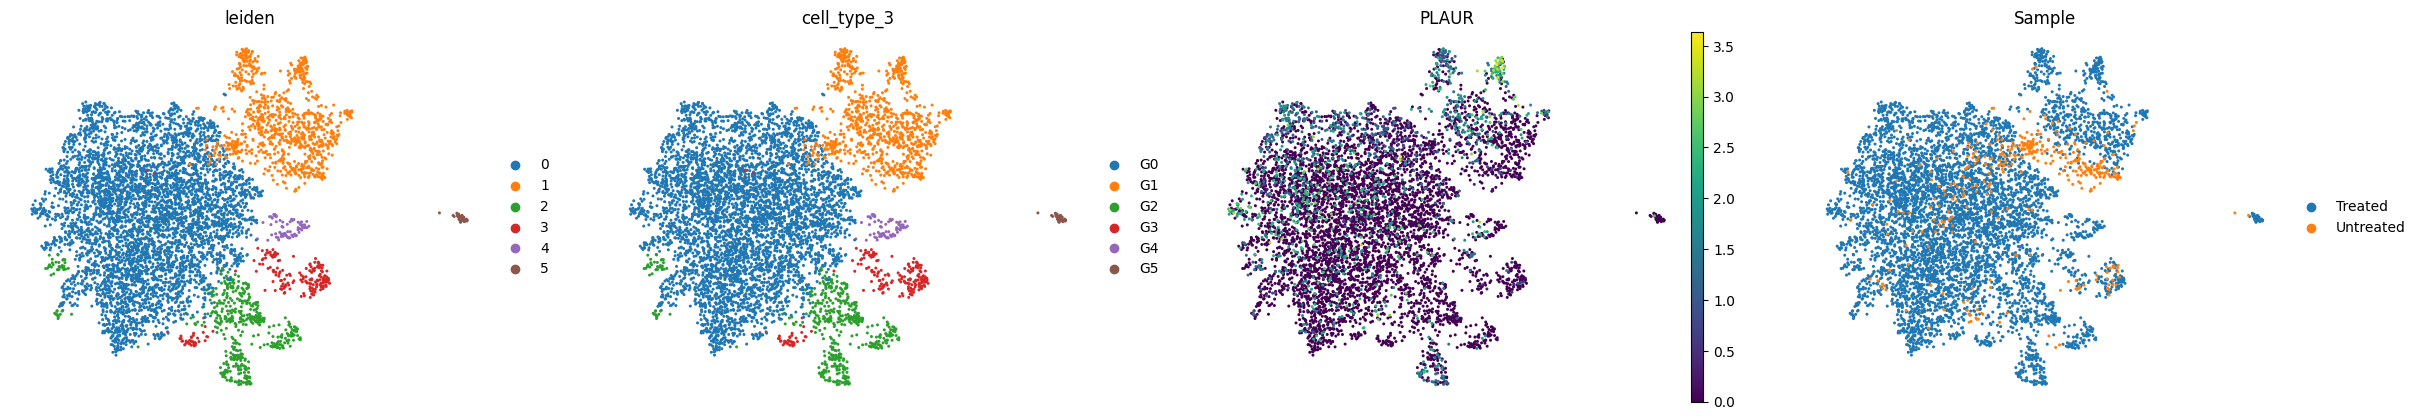

In [16]:
# Define a dictionary to map Leiden cluster labels to cell type labels
cell_type_3 = {
    "0": "G0",
    "1": "G1",
    "2": "G2",
    "3": "G3",
    "4": "G4",
    "5": "G5"
}

# Map Leiden clusters to cell types and create a new column in sub_adata.obs
sub_adata.obs['cell_type_3'] = sub_adata.obs['leiden'].map(cell_type_3)

# Plot UMAP with multiple color schemes: Leiden clusters, cell types, PLAUR expression, and Sample
sc.pl.umap(sub_adata, color=['leiden', 'cell_type_3', 'PLAUR', 'Sample'], frameon=False)

In [17]:
# Perform differential expression analysis between treated and untreated samples in cell type G0
scvi_de_sub_0 = model_2.differential_expression(
    idx1=(sub_adata.obs['cell_type_3'] == 'G0') & (sub_adata.obs['Sample'] == 'Treated'),
    idx2=(sub_adata.obs['cell_type_3'] == 'G0') & (sub_adata.obs['Sample'] == 'Untreated')
)
scvi_de_sub_0.head()

DE...:   0%|          | 0/1 [00:00<?, ?it/s]

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
gene_symbol,,,,,,,,,,,,,,,,,,,
PF4,0.9922,0.0078,4.845800,1.240422e-06,0.000027,0.0,0.25,-9.434396,-9.486710,4.764435,-25.358570,11.331520,0.001171,0.029243,0.000221,0.059259,0.021364,0.015704,True
SPRR3,0.9922,0.0078,4.845800,5.114786e-07,0.000050,0.0,0.25,-8.106557,-8.281137,4.781093,-25.720140,11.484161,0.000000,0.104093,0.000000,0.059259,0.000000,0.576965,True
PPY,0.9918,0.0082,4.795386,3.376858e-07,0.000083,0.0,0.25,-9.094881,-9.191391,5.147795,-29.122070,14.425104,0.000000,0.222419,0.000000,0.125926,0.000000,2.376638,True
AMH,0.9914,0.0086,4.747355,5.534567e-07,0.000043,0.0,0.25,-7.226399,-7.551941,5.905029,-37.866489,20.735056,0.001169,0.075462,0.000662,0.066667,0.008834,0.514240,True
IGHG4,0.9906,0.0094,4.657600,9.976771e-07,0.000034,0.0,0.25,-5.590604,-5.479336,3.031509,-16.907875,5.647864,0.000479,0.136776,0.000221,0.118519,0.003714,1.373290,True


In [18]:
# Filter DEGs with significant FDR-adjusted p-value and log fold change greater than 0.5
scvi_de_sub_0 = scvi_de_sub_0[(scvi_de_sub_0['is_de_fdr_0.05']) & (abs(scvi_de_sub_0['lfc_mean']) > 0.5)]

# Sort DEGs by log fold change in descending order
scvi_de_sub_0 = scvi_de_sub_0.sort_values('lfc_mean', ascending=False)

# Display the top 5 DEGs
scvi_de_sub_0.head()


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
gene_symbol,,,,,,,,,,,,,,,,,,,
LINC02829,0.9858,0.0142,4.240211,1.905461e-06,2.200647e-08,0.0,0.25,9.473768,8.997396,10.381977,-25.373240,60.816830,0.002265,0.0,0.001324,0.0,0.010808,0.0,True
AC009120.3,0.9874,0.0126,4.361378,6.102092e-07,9.268923e-10,0.0,0.25,9.296588,9.618751,8.468034,-23.879690,39.613060,0.001019,0.0,0.000441,0.0,0.009956,0.0,True
AL356481.3,0.9872,0.0128,4.345427,5.434129e-07,2.873842e-09,0.0,0.25,9.069321,9.028193,7.427410,-16.376938,45.314537,0.000437,0.0,0.000221,0.0,0.002724,0.0,True
TSSK4,0.9836,0.0164,4.093937,4.998515e-07,2.863739e-09,0.0,0.25,8.806283,9.020349,7.569693,-15.515684,42.926468,0.000344,0.0,0.000221,0.0,0.001296,0.0,True
AL031651.2,0.9866,0.0134,4.299009,1.247826e-06,1.136666e-08,0.0,0.25,8.763250,8.959008,6.296381,-12.385136,37.129501,0.001477,0.0,0.000882,0.0,0.007265,0.0,True


In [19]:
# Perform differential expression analysis between treated and untreated samples in cell type G1
scvi_de_sub_1 = model_2.differential_expression(
    idx1=(sub_adata.obs['cell_type_3'] == 'G1') & (sub_adata.obs['Sample'] == 'Treated'),
    idx2=(sub_adata.obs['cell_type_3'] == 'G1') & (sub_adata.obs['Sample'] == 'Untreated')
)

# Display the top rows of the differential expression results for G1
scvi_de_sub_1.head()


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
gene_symbol,,,,,,,,,,,,,,,,,,,
CRYBB3,0.9946,0.0054,5.215940,1.639436e-08,2.319230e-06,0.0,0.25,-9.592608,-9.404960,5.698955,-31.543995,14.203876,0.000000,0.009705,0.000000,0.009009,0.000000,0.019681,True
DDX3Y,0.9940,0.0060,5.109976,1.428046e-04,5.617079e-06,0.0,0.25,4.702413,4.762200,1.831797,-6.212774,11.315177,0.392144,0.000000,0.254902,0.000000,1.631564,0.000000,True
AL121601.1,0.9940,0.0060,5.109976,5.826010e-08,1.463572e-06,0.0,0.25,-9.526953,-9.497543,6.277975,-33.723248,12.972052,0.000000,0.014156,0.000000,0.022523,0.000000,0.015152,True
AC013553.4,0.9930,0.0070,4.954819,7.829525e-09,1.357085e-07,0.0,0.25,-10.076329,-9.917635,5.940155,-31.613266,14.891525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
AC009948.3,0.9928,0.0072,4.926447,9.121898e-08,5.449423e-06,0.0,0.25,-8.046915,-7.867035,5.156319,-28.692656,17.131094,0.000000,0.012632,0.000000,0.018018,0.000000,0.019836,True


In [20]:
# Filter DEGs with significant FDR-adjusted p-value and log fold change greater than 0.5 for cell type G1
scvi_de_sub_1 = scvi_de_sub_1[(scvi_de_sub_1['is_de_fdr_0.05']) & (abs(scvi_de_sub_1['lfc_mean']) > 0.5)]

# Sort DEGs by log fold change in descending order
scvi_de_sub_1 = scvi_de_sub_1.sort_values('lfc_mean', ascending=False)

# Display the top rows of the filtered and sorted DEGs for G1
scvi_de_sub_1.head()


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
gene_symbol,,,,,,,,,,,,,,,,,,,
PADI4,0.9808,0.0192,3.933458,0.000001,5.437362e-08,0.0,0.25,6.789082,6.557087,6.866411,-18.163284,35.496239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
LINC01241,0.9790,0.0210,3.842009,0.000002,1.745365e-09,0.0,0.25,6.378769,5.728510,7.330410,-15.250061,49.488441,0.002430,0.000000,0.001508,0.000000,0.009745,0.000000,True
CSF2RB,0.9864,0.0136,4.283991,0.000008,1.559264e-07,0.0,0.25,6.006578,6.140042,4.087124,-11.751839,17.810989,0.020513,0.000000,0.016591,0.000000,0.079968,0.000000,True
PROK2,0.9804,0.0196,3.912431,0.000012,8.305125e-06,0.0,0.25,5.668946,6.057220,5.600096,-20.499580,24.913912,0.020057,0.012769,0.010558,0.004505,0.155798,0.204632,True
FCGR2B,0.9784,0.0216,3.813225,0.000014,4.142151e-07,0.0,0.25,5.663988,5.782935,5.240407,-14.674185,27.665051,0.025643,0.000000,0.016591,0.000000,0.122247,0.000000,True


In [21]:
# Perform differential expression analysis between treated and untreated samples in cell type G3
scvi_de_sub_3 = model_2.differential_expression(
    idx1=(sub_adata.obs['cell_type_3'] == 'G3') & (sub_adata.obs['Sample'] == 'Treated'),
    idx2=(sub_adata.obs['cell_type_3'] == 'G3') & (sub_adata.obs['Sample'] == 'Untreated')
)

# Display the top rows of the differential expression results for G3
scvi_de_sub_3.head()

DE...:   0%|          | 0/1 [00:00<?, ?it/s]

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
gene_symbol,,,,,,,,,,,,,,,,,,,
PLK4,0.9904,0.0096,4.636345,1.189581e-05,4.183576e-08,0.0,0.25,7.318276,7.293572,4.399359,-7.434896,20.109171,0.013192,0.000000,0.005556,0.000000,0.128579,0.000000,True
THEMIS,0.9890,0.0110,4.498798,1.911911e-05,7.333762e-07,0.0,0.25,4.783266,4.901978,2.567476,-4.334373,12.933715,0.034541,0.023657,0.016667,0.035714,0.245475,0.022223,True
AC004839.2,0.9890,0.0110,4.498798,7.508461e-06,1.359587e-07,0.0,0.25,5.257906,5.329313,3.186434,-6.339144,15.972245,0.019429,0.000000,0.011111,0.000000,0.132562,0.000000,True
CSNK2A3,0.9888,0.0112,4.480577,1.422544e-08,6.928048e-11,0.0,0.25,7.557730,7.570347,9.658232,-25.983398,38.770554,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,True
AMH,0.9884,0.0116,4.445082,8.830615e-07,2.674027e-05,0.0,0.25,-5.909729,-5.685111,3.376101,-19.775530,3.973782,0.003445,0.000000,0.011111,0.000000,0.001253,0.000000,True


In [22]:
# Filter DEGs with significant FDR-adjusted p-value and log fold change greater than 0.5 for cell type G3
scvi_de_sub_3 = scvi_de_sub_3[(scvi_de_sub_3['is_de_fdr_0.05']) & (abs(scvi_de_sub_3['lfc_mean']) > 0.5)]

# Sort DEGs by log fold change in descending order
scvi_de_sub_3 = scvi_de_sub_3.sort_values('lfc_mean', ascending=False)

# Display the top rows of the filtered and sorted DEGs for G3
scvi_de_sub_3.head()


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
gene_symbol,,,,,,,,,,,,,,,,,,,
AL596223.1,0.9872,0.0128,4.345427,1.035708e-07,1.003911e-11,0.0,0.25,9.108953,9.955192,10.265938,-22.765068,39.410828,0.000000,0.0,0.000000,0.0,0.000000,0.0,True
AL162591.2,0.9828,0.0172,4.045496,7.820767e-07,9.243125e-12,0.0,0.25,9.068863,8.972829,8.425314,-18.040039,35.154594,0.000000,0.0,0.000000,0.0,0.000000,0.0,True
LINC02829,0.9844,0.0156,4.144761,3.044917e-06,1.405910e-10,0.0,0.25,8.850636,7.951051,11.246877,-27.469019,45.665249,0.010512,0.0,0.005556,0.0,0.059223,0.0,True
STEAP3-AS1,0.9820,0.0180,3.999219,9.840335e-07,3.329146e-10,0.0,0.25,8.273767,8.091850,7.013449,-12.416502,26.391628,0.000000,0.0,0.000000,0.0,0.000000,0.0,True
LINC00517,0.9826,0.0174,4.033731,4.843425e-07,3.450125e-10,0.0,0.25,8.008723,7.787615,7.614005,-18.405165,31.960354,0.000000,0.0,0.000000,0.0,0.000000,0.0,True


In [23]:
# Perform differential expression analysis between treated and untreated samples in cell type G2
scvi_de_sub_2 = model_2.differential_expression(
    idx1=(sub_adata.obs['cell_type_3'] == 'G2') & (sub_adata.obs['Sample'] == 'Treated'),
    idx2=(sub_adata.obs['cell_type_3'] == 'G2') & (sub_adata.obs['Sample'] == 'Untreated')
)

# Display the full differential expression results for G2
scvi_de_sub_2


DE...:   0%|          | 0/1 [00:00<?, ?it/s]

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
gene_symbol,,,,,,,,,,,,,,,,,,,
LINC02688,1.0000,0.0000,18.420681,8.524254e-05,2.774477e-06,0.0,0.25,4.996811,4.885934,1.416637,1.419289,9.078209,0.211135,0.000000,0.117647,0.0,1.262766,0.000000,True
ARFGEF3,1.0000,0.0000,18.420681,1.117421e-04,2.096286e-05,0.0,0.25,2.309250,2.355085,0.625935,0.373823,4.061959,0.275653,0.000000,0.163399,0.0,1.646696,0.000000,True
ELF5,1.0000,0.0000,18.420681,3.530153e-07,2.364334e-11,0.0,0.25,12.526824,12.727488,3.826286,-2.544746,24.607037,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,True
AL390037.1,1.0000,0.0000,18.420681,6.100431e-07,1.844015e-10,0.0,0.25,11.688706,11.899086,3.256089,0.685965,21.614685,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,True
FBP2,1.0000,0.0000,18.420681,1.206559e-05,1.230974e-07,0.0,0.25,6.635927,6.588547,1.921807,0.480606,12.727519,0.022968,0.000000,0.013072,0.0,0.119689,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CD59,0.2772,0.7228,-0.958393,7.342580e-04,7.142753e-04,0.0,0.25,0.038824,0.020702,0.224574,-0.634130,0.836572,2.173946,1.585696,0.838780,0.6,12.793069,17.339935,False
H3F3B,0.2680,0.7320,-1.004794,9.042399e-04,8.383195e-04,0.0,0.25,0.101208,0.102252,0.197625,-0.668808,0.718387,2.532393,1.204085,0.884532,0.4,14.701280,12.719051,False
MYL12B,0.2580,0.7420,-1.056390,7.272477e-04,7.462509e-04,0.0,0.25,-0.044627,-0.045390,0.223856,-0.866721,0.743641,1.746231,0.649944,0.734205,0.2,10.010395,8.053832,False


In [24]:
# Filter DEGs with significant FDR-adjusted p-value and log fold change greater than 0.5 for cell type G2
scvi_de_sub_2 = scvi_de_sub_2[(scvi_de_sub_2['is_de_fdr_0.05']) & (abs(scvi_de_sub_2['lfc_mean']) > 0.5)]

# Sort DEGs by log fold change in descending order
scvi_de_sub_2 = scvi_de_sub_2.sort_values('lfc_mean', ascending=False)

# Display the top rows of the filtered and sorted DEGs for G2
scvi_de_sub_2.head()


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
gene_symbol,,,,,,,,,,,,,,,,,,,
RGS7BP,0.9988,0.0012,6.724225,1.584050e-05,2.213742e-10,0.0,0.25,19.005978,19.071068,7.181921,-9.564274,36.335545,0.0181,0.0,0.013072,0.0,0.071658,0.0,True
C2CD4D-AS1,0.9998,0.0002,8.516943,8.208395e-07,2.604573e-12,0.0,0.25,18.506651,19.441978,5.547618,-4.264465,32.582382,0.0000,0.0,0.000000,0.0,0.000000,0.0,True
CELF2-DT,0.9990,0.0010,6.906745,2.105430e-07,2.358595e-12,0.0,0.25,18.385202,19.450069,6.477355,-7.012764,34.348488,0.0000,0.0,0.000000,0.0,0.000000,0.0,True
OR6A2,0.9978,0.0022,6.117091,1.153323e-07,1.256721e-11,0.0,0.25,17.455988,18.745176,7.411358,-11.075966,35.608788,0.0000,0.0,0.000000,0.0,0.000000,0.0,True
AL031651.2,0.9988,0.0012,6.724225,1.296609e-06,2.088506e-10,0.0,0.25,17.411907,19.102278,6.250655,-1.414072,28.669525,0.0000,0.0,0.000000,0.0,0.000000,0.0,True


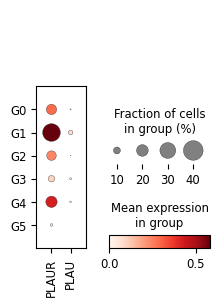

In [25]:
sc.pl.dotplot(sub_adata, ['PLAUR', 'PLAU'], groupby='cell_type_3') # Plot dotplot for PLAUR and PLAU by cell type

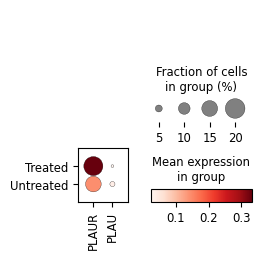

In [26]:
sc.pl.dotplot(sub_adata, ['PLAUR', 'PLAU'], groupby='Sample') # Plot dotplot for PLAUR and PLAU by Sample

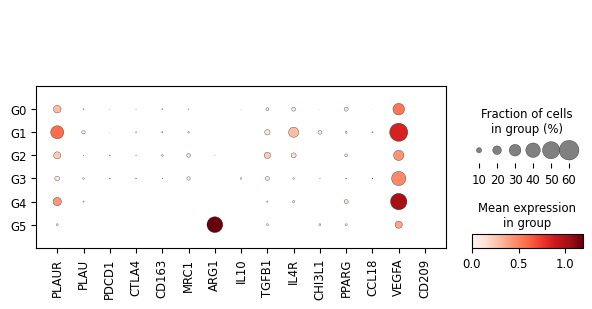

In [27]:
# Generate a dot plot to visualize the expression of M2 macrophage markers across cell types
# This will highlight uPAR (PLAUR) and VEGFA in cluster five, indicating an unconventional phenotype
sc.pl.dotplot(
    sub_adata, 
    ['PLAUR', 'PLAU', 'PDCD1', 'CTLA4', 'CD163', 'MRC1', 'ARG1', 'IL10', 'TGFB1', 'IL4R', 'CHI3L1', 'PPARG', 'CCL18', 'VEGFA', 'CD209'], 
    groupby='cell_type_3'
)


In [28]:
# Save the sub_adata object with Mann-Whitney stats and macrophage analysis for future use
sub_adata.write_h5ad(f'{base_data_path}/sub_adata_Mann_Whit__stats_Macrophages_analysis.h5ad')

In [29]:
# Load the saved sub_adata file for further analysis or continuity
sub_adata = sc.read_h5ad(f'{base_data_path}/sub_adata_Mann_Whit__stats_Macrophages_analysis.h5ad')


In [30]:
# Load the previously saved SCVI model, aligning it with the loaded sub_adata object
model_2 = scvi.model.SCVI.load(f'{base_data_path}/model_3.model_3', sub_adata)

INFO     File /Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/data/model_3.model_3/model.pt already downloaded      


/Users/klemkelab/PDAC_scRNAseq_PLAUR_GSE205013/.venv/lib/python3.12/site-packages/scvi/model/base/_save_load.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = tor

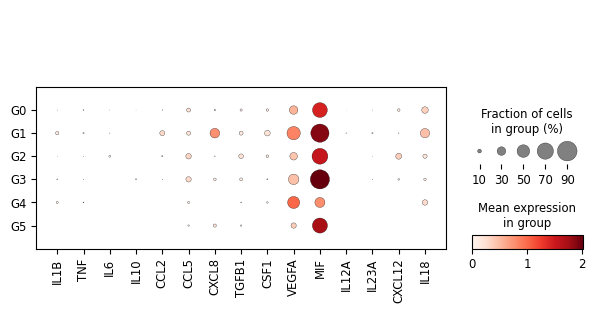

In [31]:
# Generate a dot plot to visualize the expression of cytokines secreted by TAMs across cell types
sc.pl.dotplot(
    sub_adata, 
    ['IL1B', 'TNF', 'IL6', 'IL10', 'CCL2', 'CCL5', 'CXCL8', 'TGFB1', 'CSF1', 'VEGFA', 'MIF', 'IL12A', 'IL23A', 'CXCL12', 'IL18'], 
    groupby='cell_type_3'
)


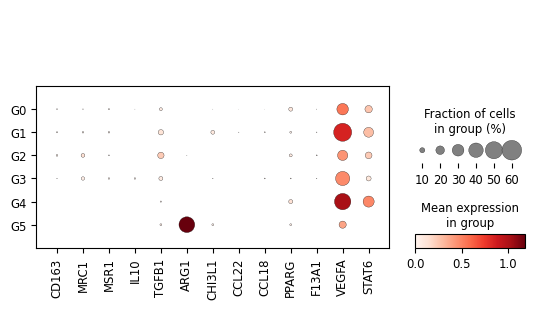

In [33]:
# Generate a dot plot to visualize expression of M2 macrophage markers (CHAT derived) across cell types
sc.pl.dotplot(
    sub_adata, 
    ['CD163', 'MRC1', 'MSR1', 'IL10', 'TGFB1', 'ARG1', 'CHI3L1', 'CCL22', 'CCL18', 'PPARG', 'F13A1', 'VEGFA', 'STAT6'], 
    groupby='cell_type_3'
)


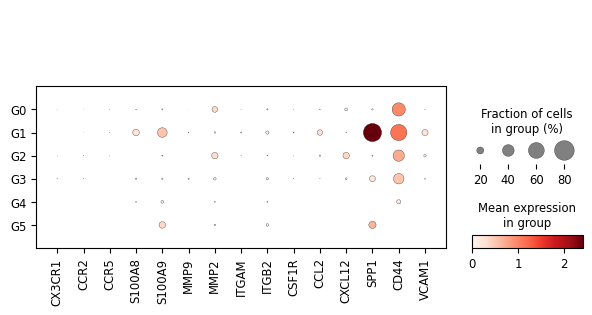

In [34]:
# Generate a dot plot to visualize expression of migratory macrophage genes across cell types
sc.pl.dotplot(
    sub_adata, 
    ['CX3CR1', 'CCR2', 'CCR5', 'S100A8', 'S100A9', 'MMP9', 'MMP2', 'ITGAM', 'ITGB2', 'CSF1R', 'CCL2', 'CXCL12', 'SPP1', 'CD44', 'VCAM1'], 
    groupby='cell_type_3'
)


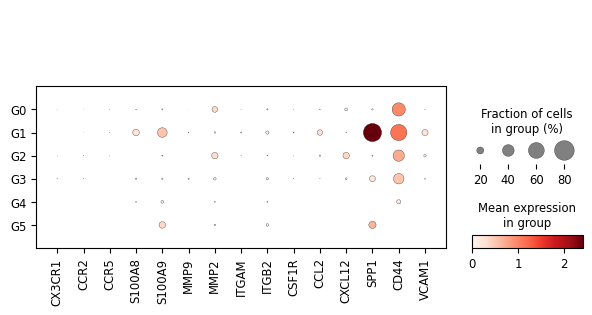

In [35]:
# List of migratory macrophage genes
migratory_macrophage_genes = ['CX3CR1', 'CCR2', 'CCR5', 'S100A8', 'S100A9', 'MMP9', 
                              'MMP2', 'ITGAM', 'ITGB2', 'CSF1R', 'CCL2', 'CXCL12', 
                              'SPP1', 'CD44', 'VCAM1']

# Check if each gene is present in sub_adata.var_names
available_genes = [gene for gene in migratory_macrophage_genes if gene in sub_adata.var_names]
missing_genes = set(migratory_macrophage_genes) - set(available_genes)

# Print missing genes, if any
if missing_genes:
    print("The following genes are missing and will be excluded from the plot:", missing_genes)

# Generate the dot plot with available genes only
sc.pl.dotplot(sub_adata, available_genes, groupby='cell_type_3')


In [37]:
# Ensure that the gene of interest, PLAUR, is in the dataset
gene_of_interest = 'PLAUR'
if gene_of_interest not in sub_adata.var_names:
    raise ValueError(f"{gene_of_interest} not found in the dataset.")

# Subset the data for cluster 3 (G3)
cluster_of_interest = 'G3'  # Ensure that 'G3' is a valid cluster in cell_type_3
adata_cluster_3 = sub_adata[sub_adata.obs["cell_type_3"] == cluster_of_interest]

# Check for 'Sample' column in adata_cluster_3
if 'Sample' not in adata_cluster_3.obs:
    raise ValueError("'Sample' column not found in adata.obs. Please ensure 'Sample' status is labeled correctly.")

# Define treated and untreated samples in cluster 3
treated = adata_cluster_3.obs['Sample'] == 'Treated'
untreated = adata_cluster_3.obs['Sample'] == 'Untreated'

# Extract PLAUR expression values for Treated and Untreated samples
plaur_expression = adata_cluster_3[:, gene_of_interest].X
if not isinstance(plaur_expression, np.ndarray):
    plaur_expression = plaur_expression.toarray()  # Convert to dense format if sparse

# Subset the gene expression for treated and untreated groups
plaur_treated = plaur_expression[treated]
plaur_untreated = plaur_expression[untreated]

# Ensure expression arrays are numerical and flattened
plaur_treated = np.asarray(plaur_treated).flatten()
plaur_untreated = np.asarray(plaur_untreated).flatten()

# Perform Mann-Whitney U test between Treated and Untreated samples for PLAUR
stat, p_value = mannwhitneyu(plaur_treated, plaur_untreated)

# Output the test results
print(f"Mann-Whitney U test for PLAUR between Treated and Untreated in cluster G3:")
print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")


Mann-Whitney U test for PLAUR between Treated and Untreated in cluster G3:
U-statistic: 2688.0
P-value: 0.2579645873134564


In [38]:
# Ensure that the gene of interest, PLAUR, is in the dataset
gene_of_interest = 'PLAUR'
if gene_of_interest not in sub_adata.var_names:
    raise ValueError(f"{gene_of_interest} not found in the dataset.")

# Subset for cluster G0
cluster_of_interest = 'G0'  # Assuming cluster 'G0' exists in cell_type_3
adata_cluster_0 = sub_adata[sub_adata.obs["cell_type_3"] == cluster_of_interest]

# Check the 'Sample' column
if 'Sample' not in adata_cluster_0.obs:
    raise ValueError("'Sample' column not found in adata.obs. Please ensure 'Sample' status is labeled correctly.")

# Subset for Treated and Untreated samples in cluster G0
treated = adata_cluster_0.obs['Sample'] == 'Treated'
untreated = adata_cluster_0.obs['Sample'] == 'Untreated'

# Extract expression values for PLAUR in Treated and Untreated groups
# Convert to dense format in case it's a sparse matrix
plaur_expression = adata_cluster_0[:, gene_of_interest].X
if not isinstance(plaur_expression, np.ndarray):
    plaur_expression = plaur_expression.toarray()  # Convert to dense array if sparse

# Now subset the gene expression values for treated and untreated groups
plaur_treated = plaur_expression[treated]
plaur_untreated = plaur_expression[untreated]

# Ensure the expression arrays are numerical
plaur_treated = np.asarray(plaur_treated).flatten()
plaur_untreated = np.asarray(plaur_untreated).flatten()

# Perform Mann-Whitney U test between Treated and Untreated samples
stat, p_value = mannwhitneyu(plaur_treated, plaur_untreated)

# Print the result
print(f"Mann-Whitney U test for PLAUR between Treated and Untreated in cluster G0:")
print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")


Mann-Whitney U test for PLAUR between Treated and Untreated in cluster G0:
U-statistic: 319611.5
P-value: 0.1763797169292306


In [39]:
# Ensure that the gene of interest, PLAUR, is in the dataset
gene_of_interest = 'PLAUR'
if gene_of_interest not in sub_adata.var_names:
    raise ValueError(f"{gene_of_interest} not found in the dataset.")

# Subset for cluster G2
cluster_of_interest = 'G2'  # Assuming cluster 'G2' exists in cell_type_3
adata_cluster_2 = sub_adata[sub_adata.obs["cell_type_3"] == cluster_of_interest]

# Check the 'Sample' column
if 'Sample' not in adata_cluster_2.obs:
    raise ValueError("'Sample' column not found in adata.obs. Please ensure 'Sample' status is labeled correctly.")

# Subset for Treated and Untreated samples in cluster G2
treated = adata_cluster_2.obs['Sample'] == 'Treated'
untreated = adata_cluster_2.obs['Sample'] == 'Untreated'

# Extract expression values for PLAUR in Treated and Untreated groups
# Convert to dense format in case it's a sparse matrix
plaur_expression = adata_cluster_2[:, gene_of_interest].X
if not isinstance(plaur_expression, np.ndarray):
    plaur_expression = plaur_expression.toarray()  # Convert to dense array if sparse

# Now subset the gene expression values for treated and untreated groups
plaur_treated = plaur_expression[treated]
plaur_untreated = plaur_expression[untreated]

# Ensure the expression arrays are numerical
plaur_treated = np.asarray(plaur_treated).flatten()
plaur_untreated = np.asarray(plaur_untreated).flatten()

# Perform Mann-Whitney U test between Treated and Untreated samples
stat, p_value = mannwhitneyu(plaur_treated, plaur_untreated)

# Print the result
print(f"Mann-Whitney U test for PLAUR between Treated and Untreated in cluster G2:")
print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")


Mann-Whitney U test for PLAUR between Treated and Untreated in cluster G2:
U-statistic: 1325.0
P-value: 0.34337697776449827


In [40]:
# Ensure that the gene of interest, PLAUR, is in the dataset
gene_of_interest = 'PLAUR'
if gene_of_interest not in sub_adata.var_names:
    raise ValueError(f"{gene_of_interest} not found in the dataset.")

# Subset for cluster G1
cluster_of_interest = 'G1'  # Assuming cluster 'G1' exists in cell_type_3
adata_cluster_1 = sub_adata[sub_adata.obs["cell_type_3"] == cluster_of_interest]

# Check the 'Sample' column
if 'Sample' not in adata_cluster_1.obs:
    raise ValueError("'Sample' column not found in adata.obs. Please ensure 'Sample' status is labeled correctly.")

# Subset for Treated and Untreated samples in cluster G1
treated = adata_cluster_1.obs['Sample'] == 'Treated'
untreated = adata_cluster_1.obs['Sample'] == 'Untreated'

# Extract expression values for PLAUR in Treated and Untreated groups
# Convert to dense format in case it's a sparse matrix
plaur_expression = adata_cluster_1[:, gene_of_interest].X
if not isinstance(plaur_expression, np.ndarray):
    plaur_expression = plaur_expression.toarray()  # Convert to dense array if sparse

# Now subset the gene expression values for treated and untreated groups
plaur_treated = plaur_expression[treated]
plaur_untreated = plaur_expression[untreated]

# Ensure the expression arrays are numerical
plaur_treated = np.asarray(plaur_treated).flatten()
plaur_untreated = np.asarray(plaur_untreated).flatten()

# Perform Mann-Whitney U test between Treated and Untreated samples
stat, p_value = mannwhitneyu(plaur_treated, plaur_untreated)

# Print the result
print(f"Mann-Whitney U test for PLAUR between Treated and Untreated in cluster G1:")
print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")


Mann-Whitney U test for PLAUR between Treated and Untreated in cluster G1:
U-statistic: 94358.5
P-value: 1.2056708906184162e-13


In [43]:
# Ensure that the gene of interest, PLAUR, is in the dataset
gene_of_interest = 'PLAUR'
if gene_of_interest not in sub_adata.var_names:
    raise ValueError(f"{gene_of_interest} not found in the dataset.")

# Subset for cluster G4
cluster_of_interest = 'G4'  # Assuming cluster 'G4' exists in cell_type_3
adata_cluster_4 = sub_adata[sub_adata.obs["cell_type_3"] == cluster_of_interest]

# Check the 'Sample' column
if 'Sample' not in adata_cluster_4.obs:
    raise ValueError("'Sample' column not found in adata.obs. Please ensure 'Sample' status is labeled correctly.")

# Subset for Treated and Untreated samples in cluster G4
treated = adata_cluster_4.obs['Sample'] == 'Treated'
untreated = adata_cluster_4.obs['Sample'] == 'Untreated'

# Extract expression values for PLAUR in Treated and Untreated groups
# Convert to dense format in case it's a sparse matrix
plaur_expression = adata_cluster_4[:, gene_of_interest].X
if not isinstance(plaur_expression, np.ndarray):
    plaur_expression = plaur_expression.toarray()  # Convert to dense array if sparse

# Now subset the gene expression values for treated and untreated groups
plaur_treated = plaur_expression[treated]
plaur_untreated = plaur_expression[untreated]

# Ensure the expression arrays are numerical
plaur_treated = np.asarray(plaur_treated).flatten()
plaur_untreated = np.asarray(plaur_untreated).flatten()

# Perform Mann-Whitney U test between Treated and Untreated samples
stat, p_value = mannwhitneyu(plaur_treated, plaur_untreated)

# Print the result
print(f"Mann-Whitney U test for PLAUR between Treated and Untreated in cluster G4:")
print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")


Mann-Whitney U test for PLAUR between Treated and Untreated in cluster G4:
U-statistic: nan
P-value: nan


/var/folders/d1/z52n225j7jl7n5v2t5tb35n80000gn/T/ipykernel_47038/926162811.py:33: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value = mannwhitneyu(plaur_treated, plaur_untreated)


In [44]:
# Ensure that the gene of interest, PLAUR, is in the dataset
gene_of_interest = 'PLAUR'
if gene_of_interest not in sub_adata.var_names:
    raise ValueError(f"{gene_of_interest} not found in the dataset.")

# Subset for cluster G5
cluster_of_interest = 'G5'  # Assuming cluster 'G5' exists in cell_type_3
adata_cluster_5 = sub_adata[sub_adata.obs["cell_type_3"] == cluster_of_interest]

# Check the 'Sample' column
if 'Sample' not in adata_cluster_5.obs:
    raise ValueError("'Sample' column not found in adata.obs. Please ensure 'Sample' status is labeled correctly.")

# Subset for Treated and Untreated samples in cluster G5
treated = adata_cluster_5.obs['Sample'] == 'Treated'
untreated = adata_cluster_5.obs['Sample'] == 'Untreated'

# Extract expression values for PLAUR in Treated and Untreated groups
# Convert to dense format in case it's a sparse matrix
plaur_expression = adata_cluster_5[:, gene_of_interest].X
if not isinstance(plaur_expression, np.ndarray):
    plaur_expression = plaur_expression.toarray()  # Convert to dense array if sparse

# Now subset the gene expression values for treated and untreated groups
plaur_treated = plaur_expression[treated]
plaur_untreated = plaur_expression[untreated]

# Ensure the expression arrays are numerical
plaur_treated = np.asarray(plaur_treated).flatten()
plaur_untreated = np.asarray(plaur_untreated).flatten()

# Perform Mann-Whitney U test between Treated and Untreated samples
stat, p_value = mannwhitneyu(plaur_treated, plaur_untreated)

# Print the result
print(f"Mann-Whitney U test for PLAUR between Treated and Untreated in cluster G5:")
print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")


Mann-Whitney U test for PLAUR between Treated and Untreated in cluster G5:
U-statistic: 37.0
P-value: 0.9061856157549283


In [45]:
# Ensure that the gene of interest, PLAUR, is in the dataset
gene_of_interest = 'PLAUR'
if gene_of_interest not in sub_adata.var_names:
    raise ValueError(f"{gene_of_interest} not found in the dataset.")

# Subset for cluster G6
cluster_of_interest = 'G6'  # Assuming cluster 'G6' exists in cell_type_3
adata_cluster_6 = sub_adata[sub_adata.obs["cell_type_3"] == cluster_of_interest]

# Check the 'Sample' column
if 'Sample' not in adata_cluster_6.obs:
    raise ValueError("'Sample' column not found in adata.obs. Please ensure 'Sample' status is labeled correctly.")

# Subset for Treated and Untreated samples in cluster G6
treated = adata_cluster_6.obs['Sample'] == 'Treated'
untreated = adata_cluster_6.obs['Sample'] == 'Untreated'

# Extract expression values for PLAUR in Treated and Untreated groups
# Convert to dense format in case it's a sparse matrix
plaur_expression = adata_cluster_6[:, gene_of_interest].X
if not isinstance(plaur_expression, np.ndarray):
    plaur_expression = plaur_expression.toarray()  # Convert to dense array if sparse

# Now subset the gene expression values for treated and untreated groups
plaur_treated = plaur_expression[treated]
plaur_untreated = plaur_expression[untreated]

# Ensure the expression arrays are numerical
plaur_treated = np.asarray(plaur_treated).flatten()
plaur_untreated = np.asarray(plaur_untreated).flatten()

# Perform Mann-Whitney U test between Treated and Untreated samples
stat, p_value = mannwhitneyu(plaur_treated, plaur_untreated)

# Print the result
print(f"Mann-Whitney U test for PLAUR between Treated and Untreated in cluster G6:")
print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")


Mann-Whitney U test for PLAUR between Treated and Untreated in cluster G6:
U-statistic: nan
P-value: nan


/var/folders/d1/z52n225j7jl7n5v2t5tb35n80000gn/T/ipykernel_47038/620329911.py:33: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_value = mannwhitneyu(plaur_treated, plaur_untreated)


In [54]:
idx1 = (sub_adata.obs['cell_type_3'].isin(['G1', 'G2', 'G3', 'G5', 'G7', 'G8'])) & (sub_adata.obs['Sample'] == 'Treated')
idx2 = (sub_adata.obs['cell_type_3'].isin(['G6', 'G9', 'G4'])) & (sub_adata.obs['Sample'] == 'Untreated')

print(f"Number of cells in idx1 (Treated): {idx1.sum()}")
print(f"Number of cells in idx2 (Untreated): {idx2.sum()}")


Number of cells in idx1 (Treated): 1338
Number of cells in idx2 (Untreated): 0


In [55]:
if idx1.sum() > 0 and idx2.sum() > 0:
    scvi_de_sub_all = model_2.differential_expression(idx1=idx1, idx2=idx2)
else:
    print("One of the groups has no cells; please adjust your conditions.")


One of the groups has no cells; please adjust your conditions.


In [56]:
sc.tl.rank_genes_groups(sub_adata, 'leiden')

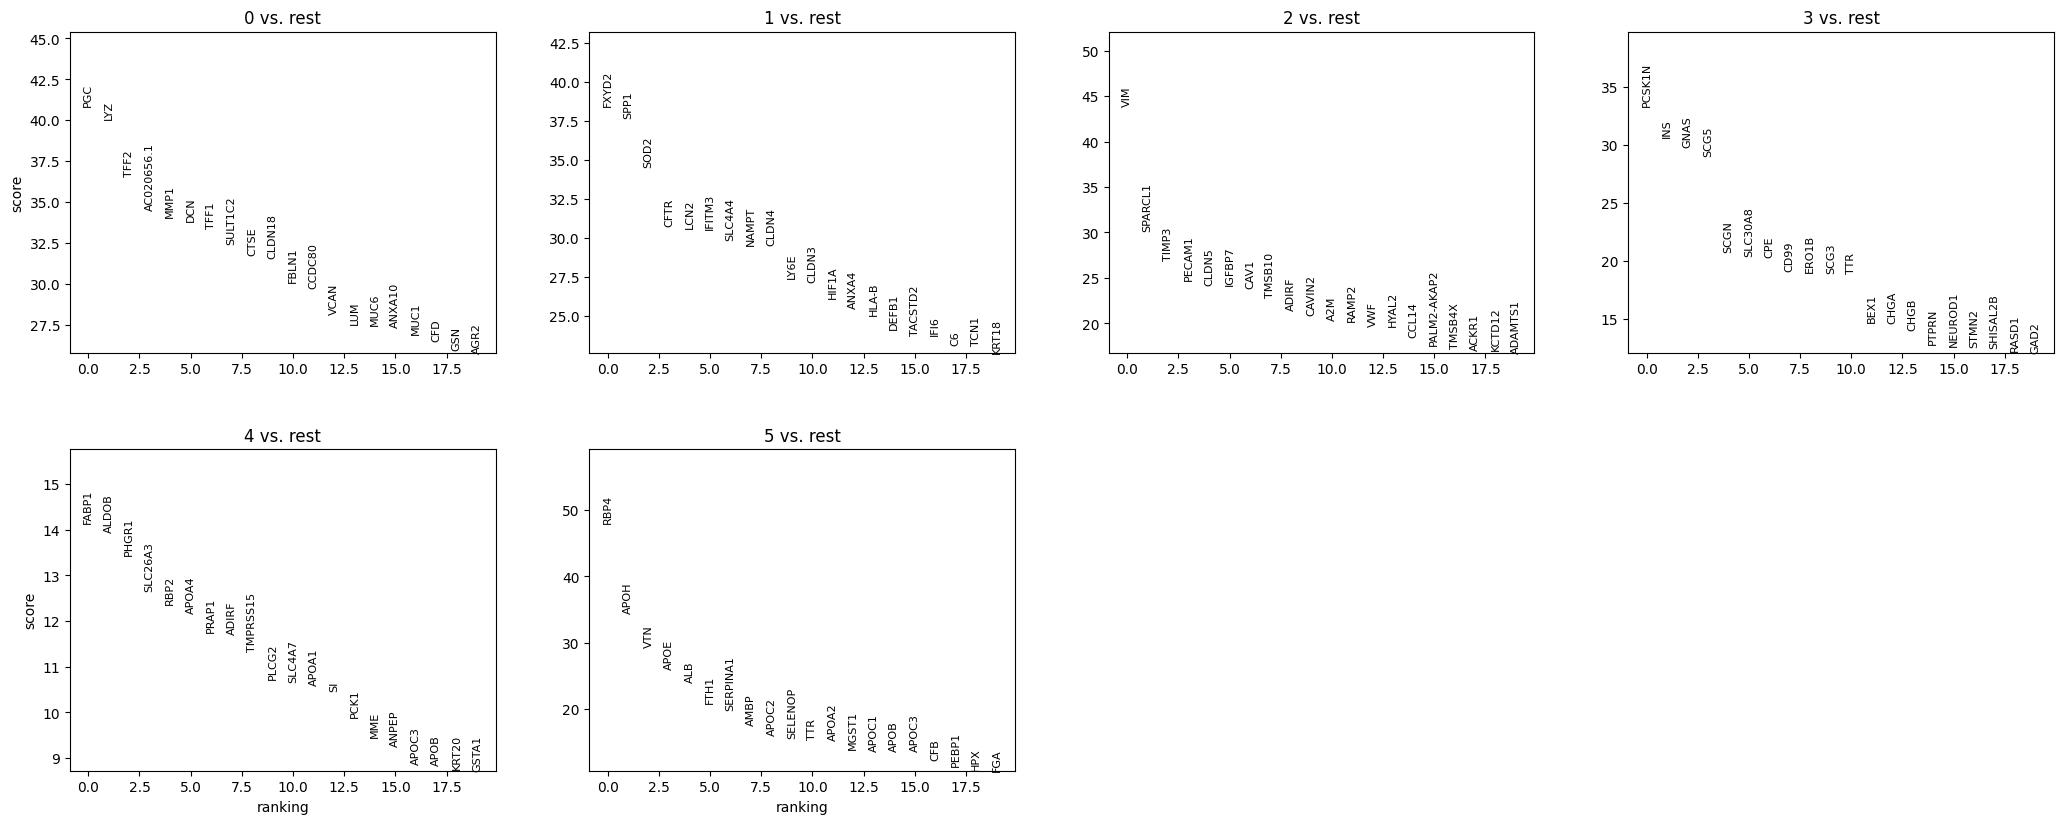

In [57]:
sc.pl.rank_genes_groups(sub_adata, n_genes=20, sharey=False)

In [58]:
markers_2 = sc.get.rank_genes_groups_df(sub_adata, None)
markers_2 = markers_2[(markers_2.pvals_adj < 0.05) & (markers_2.logfoldchanges > .5)]
markers_2

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,PGC,40.883469,3.402034,4.500243e-288,1.206560e-283
1,0,LYZ,40.074642,2.985817,2.550030e-262,3.418443e-258
2,0,TFF2,36.580177,2.839402,9.653667e-245,8.627483e-241
3,0,AC020656.1,34.498566,2.393413,1.009459e-218,4.510766e-215
4,0,MMP1,34.087551,2.489684,2.625782e-219,1.407997e-215
...,...,...,...,...,...,...
134390,5,PROX1,2.334743,2.838432,2.508190e-02,4.752780e-02
134391,5,PCBD1,2.333917,1.594549,2.511688e-02,4.758399e-02
134392,5,KDELR3,2.327138,2.246249,2.552220e-02,4.829726e-02
134393,5,TFR2,2.315969,7.720995,2.620550e-02,4.945071e-02


In [59]:
sub_adata.write_h5ad(f'{base_data_path}/sub_adata_sub_cluster_2_FINAL.h5ad')

In [60]:
sub_adata = sc.read_h5ad(f'{base_data_path}/sub_adata_sub_cluster_2_FINAL.h5ad')